In [15]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.interpolate
import scipy.stats
import scipy.optimize
from datetime import datetime
import pylandau

import uproot

from ipywidgets import IntProgress
from IPython.display import display

matplotlib.rcParams['figure.figsize'] = [12,8]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def langauss(x, N, mu, sigma, alpha, beta):
    """
    Landau convoluted with a Gaussian.
    """
    return N * scipy.stats.norm.pdf(x, mu, sigma) * scipy.stats.laplace.pdf(x, alpha, beta)

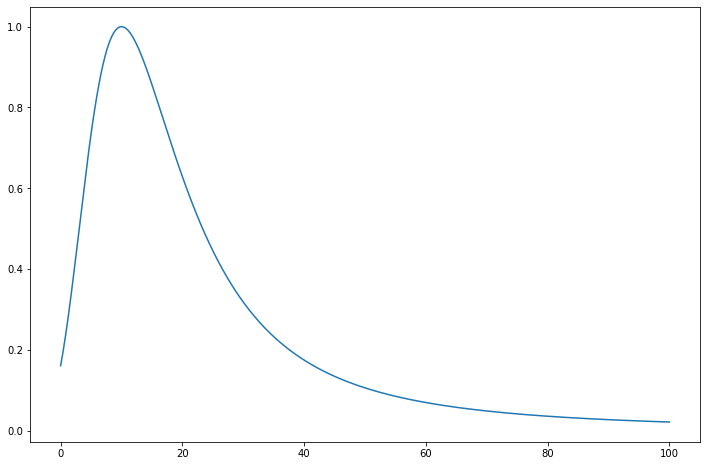

In [21]:
x = np.linspace(0,100,1000)

plt.plot(x, pylandau.langau(x, 10, 5, 1, 1))


In [14]:
df = pd.read_pickle('/mnt/c/Users/oh6/Downloads/JANUS/bin/DataFiles/dt5202/TileTesting/20230728_Hamamatsu3mmAnd13mm_9erStack_45V/Run44_list.pkl')
df.channel.unique()

array([ 0, 32, 33, 34, 35, 36, 38, 40, 42, 43])

33: 52.78546712802768 52.27751196172249
34: 54.67985508628087 52.22952622673435


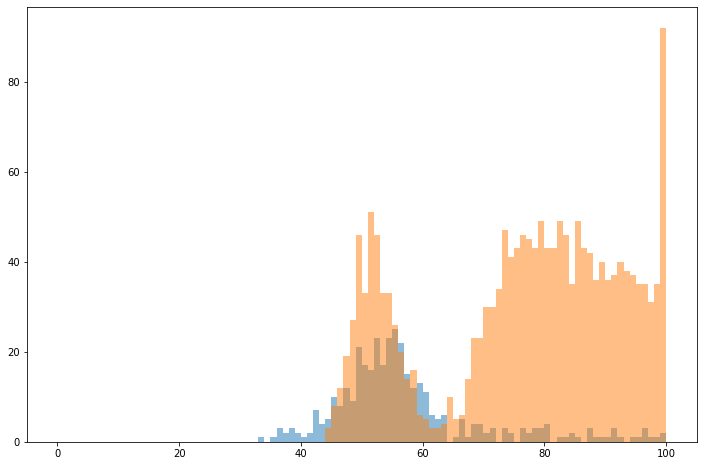

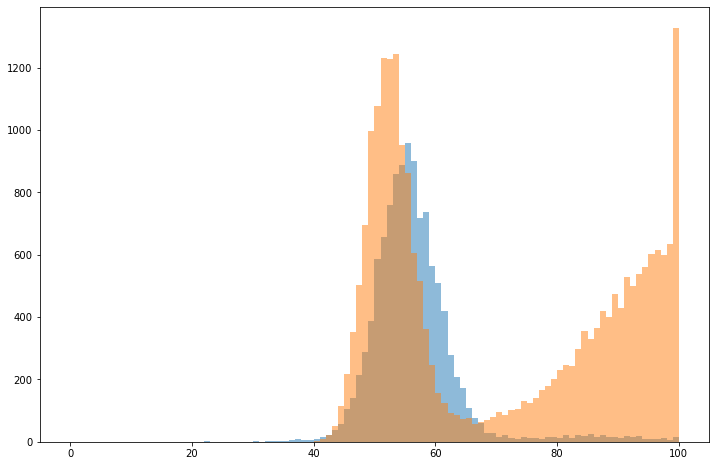

In [94]:
#HG LG

for chn in [33, 34]:
    dft = df[(df.channel == chn)]
    plt.figure()
    plt.hist(dft.HG, range=(0,100), bins = 100, alpha = 0.5)
    plt.hist(dft.LG, range=(0,100), bins = 100, alpha = 0.5)

    print(f'{chn}: {df[(df.channel == chn) & (df.HG > 40) & (df.HG < 65)].HG.mean()} {df[(df.channel == chn) & (df.LG > 40) & (df.LG < 65)].LG.mean()}')



(array([   9.94151904, -392.01222985]), array([[ 1.32467840e-05, -3.15047968e-03],
       [-3.15047968e-03,  8.06827742e-01]]))
(array([   9.46156209, -433.37422628]), array([[ 3.65446717e-05, -4.18714144e-03],
       [-4.18714144e-03,  5.25154868e-01]]))


channel
33      [9.9415190416727, -392.01222984574764]
34    [9.461562087937843, -433.37422628127996]
dtype: object

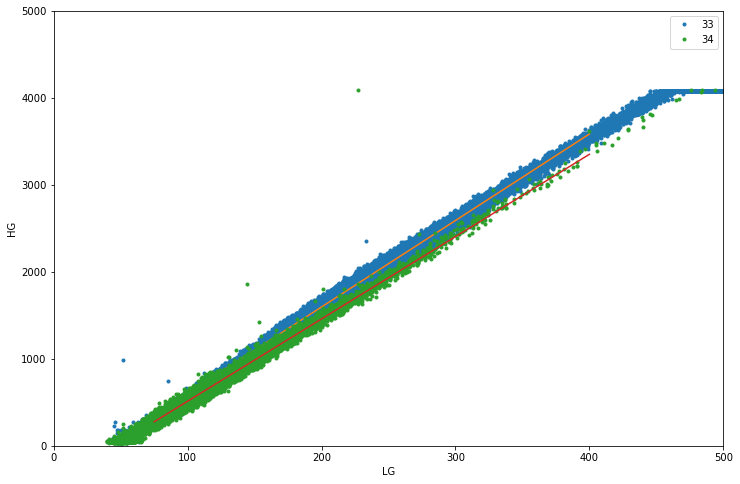

In [58]:
def plot_channel(df):
    fit_range_hg = np.array([75,4000])
    df_fit = df.loc[(df.HG > fit_range_hg[0]) & (df.HG < fit_range_hg[1])]

    def linear(x, a, b):
        return a*x+b
    
    fit = scipy.optimize.curve_fit(linear,  df_fit.LG, df_fit.HG, p0=(10,-100))
    print(fit)

    plt.plot(df.LG, df.HG, '.', label=df.channel.unique()[0])
    plt.xlabel('LG')
    plt.ylabel('HG')

    fit_range_lg = np.array([75,400])
    plt.plot(fit_range_lg, linear(fit_range_lg, *fit[0]), )

    return fit[0]

df_intercalib = df[(df.channel == 34) | (df.channel == 33)].groupby('channel').apply(plot_channel)

plt.legend()
plt.xlim(0,500)
plt.ylim(0,5000)

df_intercalib

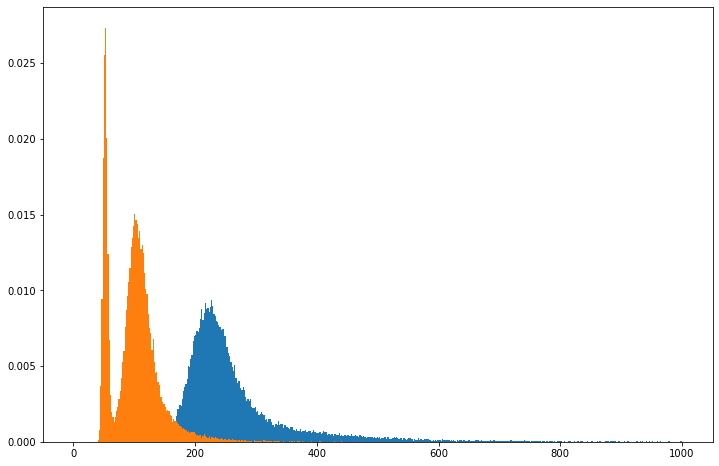

In [129]:
ch33_ped_LG = 51.6
ch33_IC = 9.94

ch34_ped_LG = 51.8
ch34_IC = 9.46


#_ = plt.hist((df[(df.channel == 33)].LG - ch33_ped_LG) * ch33_IC / 26.8, bins=1000, range = (0, 149))
#_ = plt.hist((df[(df.channel == 34)].LG - ch34_ped_LG) * ch34_IC / 34.7, bins=1000, range = (0, 149))

con33, bins33, _ = plt.hist(df[(df.channel == 33)].LG, bins=500, range = (0, 1000), density = True)
con34, bins34, _ = plt.hist(df[(df.channel == 34)].LG, bins=500, range = (0, 1000), density = True)




RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

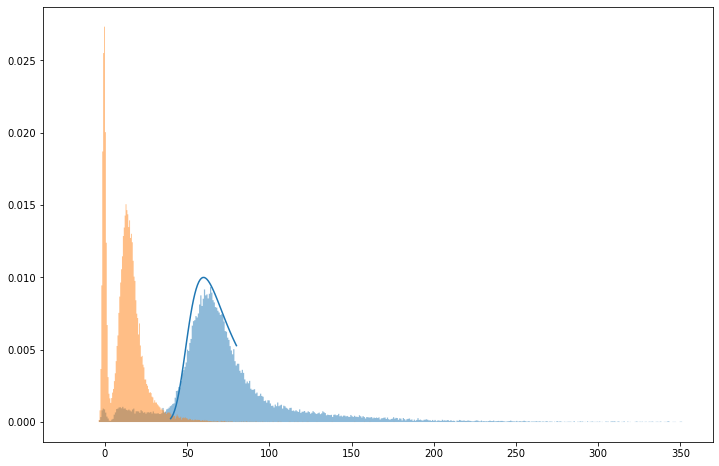

In [146]:
bins33c = (bins33[:-1] - ch33_ped_LG)*ch33_IC/26.8
bins34c = (bins34[:-1] - ch34_ped_LG)*ch34_IC/34.7

plt.fill_between(bins33c, con33, step='pre', label='ch33', alpha = 0.5)
plt.fill_between(bins34c, con34, step='pre', label='ch34', alpha = 0.5)

#plt.step((bins33[:-1] - ch33_ped_LG)*ch33_IC/26.8, con33, where='pre', label='ch33')
#plt.step((bins34[:-1] - ch34_ped_LG)*ch34_IC/34.7, con34, where='pre', label='ch34')

x33 = np.linspace(40, 80)

mask33 = (bins33c>40) & (bins33c<80)

plt.plot(x33, pylandau.langau(x33, 60, 8, 1, 1)*0.010, label='ch33')

#r, c = scipy.optimize.curve_fit(pylandau.langau, bins33c[mask33], con33[mask33]/0.01, p0=(60, 8, 1, 1))

#print(r)

#plt.plot(x33, pylandau.langau(x33,*r)*0.010, label='ch33')


plt.xlim(-10, 125)
plt.ylim(0)